# Load the mzxml data

In [1]:
import ms_deisotope

# automatically determine the appropriate reader type
# by inspecting the file

reader = ms_deisotope.MSFileLoader('/home/gang/Documents/Data_Science/Python Project/ms_deisotope/923_22plus3_RM_O.mzxml')
bunch=next(reader)

# Some initial check

In [2]:
# check if the MS peaks is a profile
bunch.precursor.is_profile

True

# Centroid the peaks

In [3]:
# Centroid the peaks
bunch.precursor.pick_peaks()

# check the number of peaks
bunch.precursor.peak_set 

# view the peaks 
bunch.precursor.arrays

RawDataArrays(mz=array([ 999.814  ,  999.8335 ,  999.85297, ..., 7020.373  , 7020.425  ,
       7020.4766 ], dtype=float32), intensity=array([1.4565827 , 1.1764706 , 1.1204482 , ..., 0.        , 0.11204482,
       0.05602242], dtype=float32))

# Deconvolute

In [4]:
res=ms_deisotope.deconvolution.deconvolute_peaks(bunch.precursor.peak_set,
                                             averagine=ms_deisotope.permethylated_glycan, 
                                             charge_range=(1,1),
                                             charge_carrier=22.989769,
                                             error_tolerance=2e-03,
                                             scorer=ms_deisotope.MSDeconVFitter(5.))



# Obtain ms and intensity values

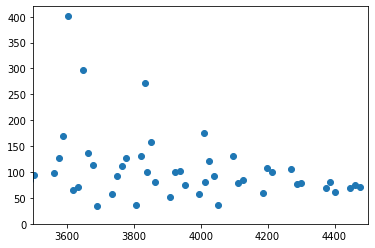

In [9]:
import matplotlib.pyplot as plt
import numpy as np

mz=[]
intensity=[]
for i in range(0,len(res[0])):
        mz.append(res[0][i].mz)
        intensity.append(res[0][i].intensity)

plt.scatter(mz,intensity)
plt.xlim(3500,4500)
plt.ylim(0,420)
plt.show()

In [6]:
mz

array([1087.46861756, 1141.52427592, 1261.53524636, 1484.60611262,
       1579.70178871, 1590.70780227, 1595.65892727, 1688.70679494,
       1764.77482985, 1783.7824992 , 1784.05627295, 1794.77592754,
       1799.75524501, 1835.81875212, 1865.83445637, 1906.84031621,
       1951.84096783, 1968.87194162, 1981.8513473 , 1987.86754321,
       1998.87172543, 2003.83322871, 2039.90258721, 2069.90237478,
       2080.90701294, 2110.91831054, 2155.93541376, 2171.92626074,
       2185.94717594, 2191.95278857, 2202.97338727, 2207.91718898,
       2213.96040227, 2226.9449768 , 2243.97108683, 2273.9919697 ,
       2285.00015516, 2314.99873185, 2377.02516125, 2390.030026  ,
       2396.03778168, 2401.03265644, 2412.00152229, 2418.05583529,
       2431.04804453, 2448.05853478, 2459.07198662, 2474.04380126,
       2489.08076171, 2500.08049339, 2576.10453807, 2592.13504687,
       2600.12356297, 2605.12734902, 2621.11700649, 2633.16114344,
       2646.14713603, 2650.13305001, 2663.16142267, 2676.16207

In [7]:
len(mz)

164

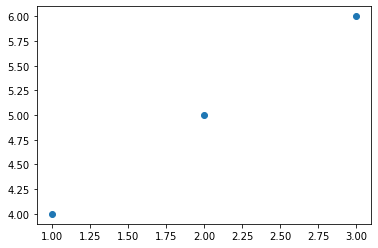

In [8]:
x=[1,2,3]
y=[4,5,6]
plt.scatter(x,y)